In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
bank = pd.read_csv("bank.csv",sep=';')

In [4]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
bank.shape

(4521, 17)

In [6]:
bank.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [7]:
bank.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.duplicated().sum()

0

In [10]:
bank[bank.duplicated()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

C:\Users\new\Desktop\Prodigy_DS_03\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


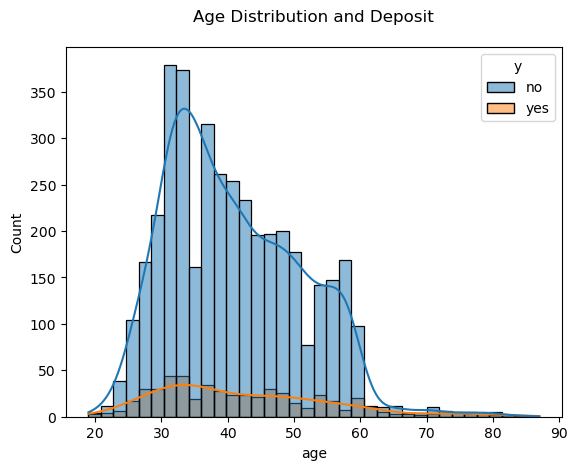

In [11]:
sns.histplot(x="age", data=bank, kde=True, hue="y")
plt.title("Age Distribution and Deposit\n")
plt.show()

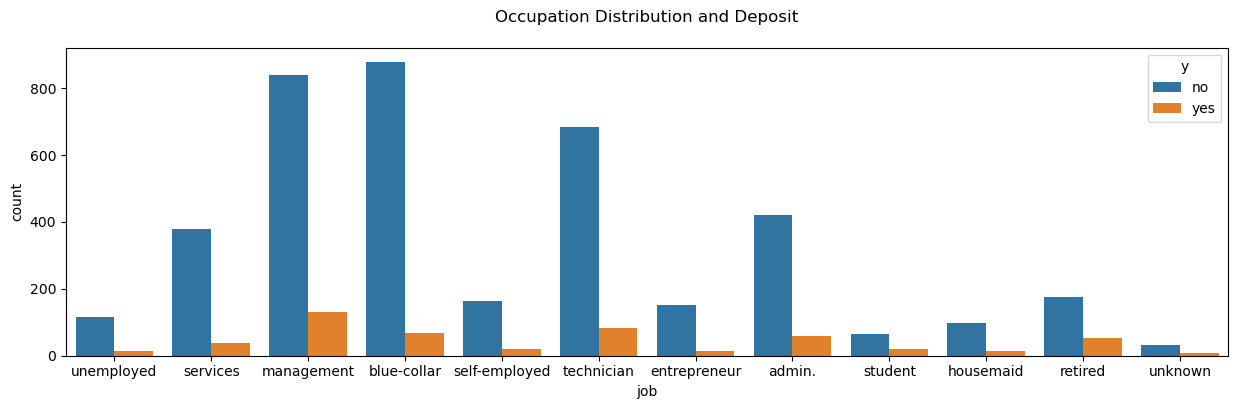

In [12]:
plt.figure(figsize=(15,4))
sns.countplot(x="job",data= bank, hue="y")
plt.title("Occupation Distribution and Deposit\n")
plt.show()

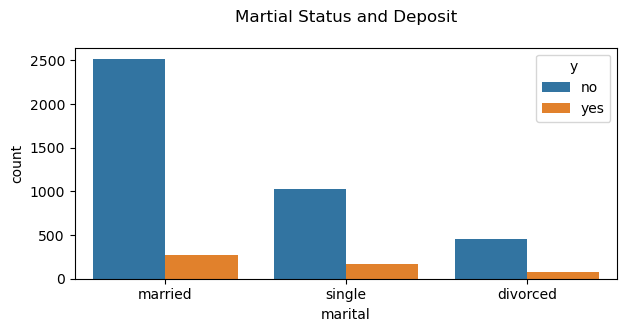

In [13]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Martial Status and Deposit\n")
plt.show()



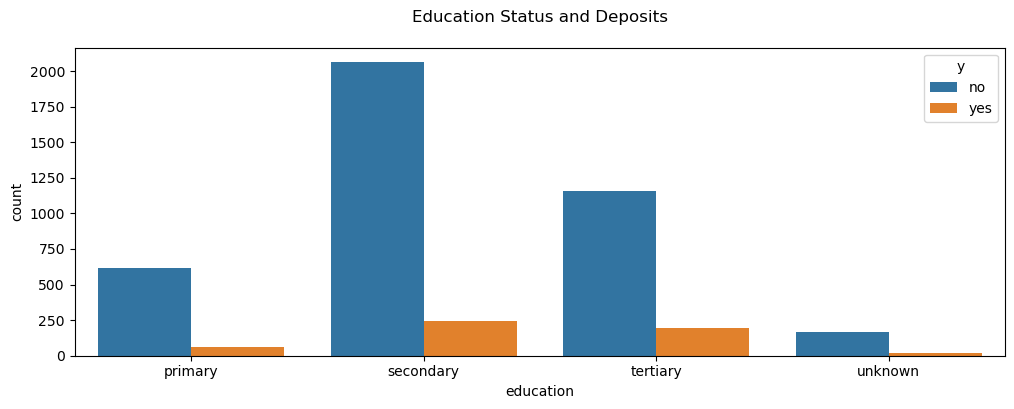

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [15]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

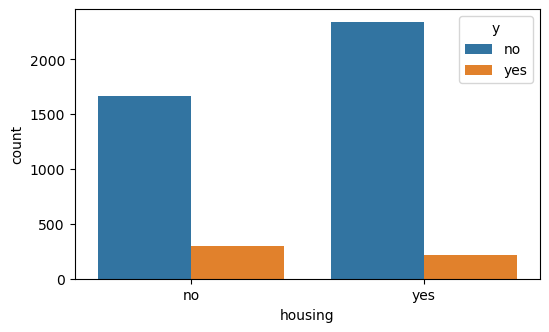

In [16]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue="y")
plt.tilte("Housing Loan Distributuion and Deposit\n")
plt.show()

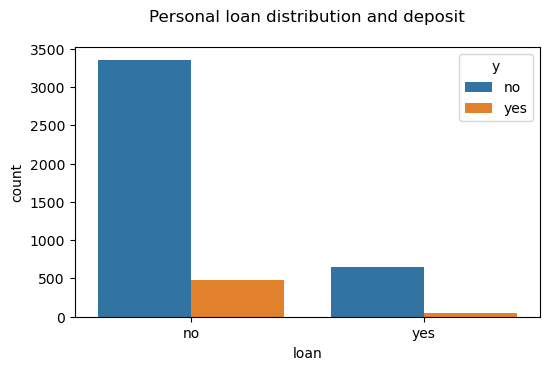

In [17]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data = bank, hue ="y")
plt.title("Personal loan distribution and deposit\n")
plt.show()

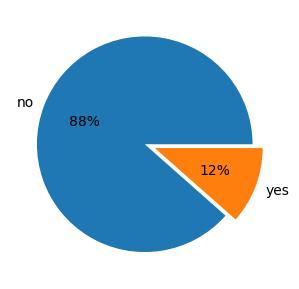

In [18]:
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [19]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [20]:
le= LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)

In [21]:
bank.head(3)

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0

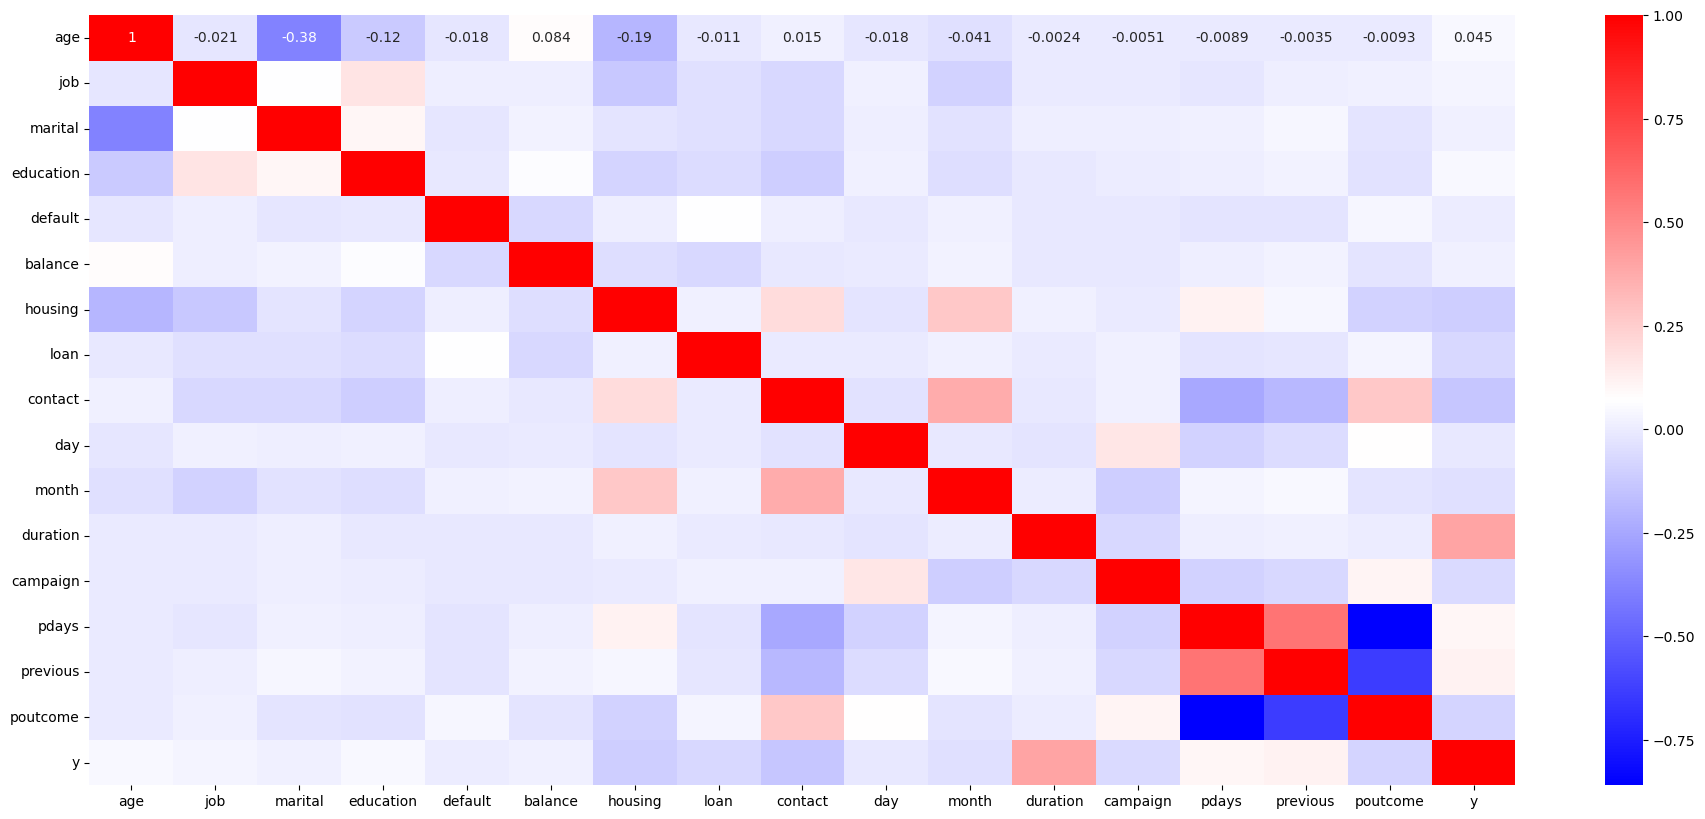

In [23]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [24]:
x = bank.drop("y", axis=1)
y = bank.y

In [25]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [26]:
train_x,test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.3)

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [28]:
print('Train Score: {}'.format(decision_tree.score(train_x, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_x, test_y)))


Train Score: 1.0
Test Score: 0.8703021370670597


In [29]:
cross_val_score(decision_tree, train_x, train_y, cv=5).mean()


0.8555602215689803

In [32]:
ypred = decision_tree.predict(test_x)
print(classification_report(test_y, ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1214
           1       0.39      0.43      0.41       143

    accuracy                           0.87      1357
   macro avg       0.66      0.68      0.67      1357
weighted avg       0.88      0.87      0.87      1357



In [33]:
param_grid = {
    'max_depth':[3,5,7,10,None],
    'criterion':['ginni','entropy'],
    'min_sample_leaf':[3,5,7,9,10,20]
}

In [55]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_x, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


ValueError: Invalid parameter 'min_sample_leaf' for estimator DecisionTreeClassifier(criterion='ginni', max_depth=3). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [56]:
gscv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [57]:
gscv.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [42]:
cross_val_score(gscv.best_estimator_, train_x2, train_y, cv=5).mean() 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [43]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [44]:
print('Train Score: {}'.format(clf.score(train_x, train_y)))
print('Test Score: {}'.format(clf.score(test_x, test_y)))

Train Score: 0.911504424778761
Test Score: 0.8953574060427414


In [45]:
pred_y = clf.predict(test_x)

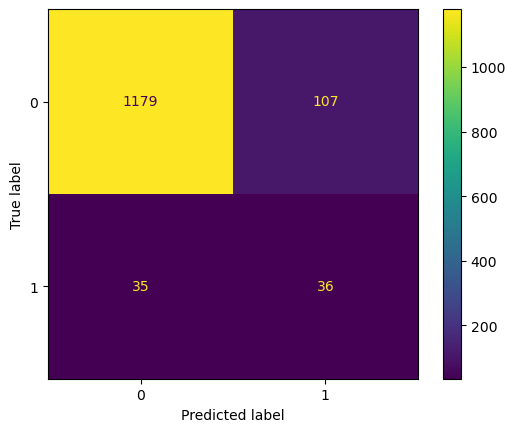

In [46]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()
plt.show()

In [47]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1286
           1       0.25      0.51      0.34        71

    accuracy                           0.90      1357
   macro avg       0.61      0.71      0.64      1357
weighted avg       0.93      0.90      0.91      1357



In [48]:
accuracy= accuracy_score(test_y, pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.53574060427414


In [49]:
Cross_val = cross_val_score(clf, test_x, test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Desicion Tree:", Cross_val*100)

Cross-Validation Accuracy Scores Desicion Tree: 87.6945409159974


In [54]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=x.columns)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object') instead.

<Figure size 2500x2000 with 0 Axes>